## EDA of Kickstarter Data

For this project we're going to explore a free dataset on Kaggle with Kickstarter project data from May 2009 to March 2018. We will perform some EDA on the data (Exploratory Data Analysis) to gather any insights. 

**Questions to Answer:**  
1a. Examine the `state` column to see unique values and counts.  
1b. Show a pie chart of the `state` project count for all projects.  
1c. Create a new "Completed" dataframe that removes any rows with state of 'live', 'undefined', or suspended.  
*note - from here out we'll be looking at the completed project data unless mentioned otherwise*

2a. What is the overall success rate for all completed kickstarter projects?  
2b. Which 5 projects were pledged the most money (usd_pledged_real)?  
2c. Which 5 projects had the most backers?  
2d. Which year had the most competition? (# of projects)  

3a. What is the success rate for all projects broken down by `main_category`?  
3b. Show a horizontal bar chart for project success rate by `main_category`, sorted by highest to lowest.  
3c. Within the Games `main_category`, what is the success rate for each `category` within it?  

4a. Calculate the 'pct_of_goal' for each completed project  
4b. What were the top 5 projects when looking at pct_of_goal for all time?  
4c. Plot a histogram distribution of all completed projects by pct_of_goal  
4d. Create 2 histogram subplots by pct_of_goal: 1) state=successful, and 2) all others (failed)  

5a. What is the average `usd_goal_real` for all *completed* kickstarter projects, broken down by `main_category`.  
5b. What is the median `usd_goal_real` for all *completed* kickstarter projects, broken down by `main_category`.  
5c. What is the average `usd_pledged_real` for all *completed* kickstarter projects, broken down by `main_category`.  
5d. What is the median `usd_pledged_real` for all *completed* kickstarter projects, broken down by `main_category`.  
5e. What insights does this information provide?  
5f. Based on this information, if someone wanted to choose the `main_category` with the highest combined success rate and pledged dollar amount, which one would you recommend?  

6a. Create a new column 'months' that shows how many months the project was active between launch and deadline.  
6b. Compare the avg months for successful projects vs non-successful.  Add visuals if you'd like.  
6c. Does the length of a project in months seem to have an impact?  

*Let's zoom in on Games: Video Games (main_category: category)*

7a. Calculate the expected value for the Games: Video Games category, with the expected value defined as (median of usd_pledged_real)* (success rate of completed projects).  
7b. Do this again but broken down by deadline year  
7c. Show this in a bar chart  
7d. What insights does this data provide you?  

*Let's zoom in on personal planners*

8a. Calculate the project count, success rate, and pct_of_goal for all projects with 'planner' in the name.  Check for spelling variations in upper/lowercase.  
8b. How about all projects with both 'planner' and 'Panda' in the name?  
8c. Congrats Panda Planner!  (That's my bro's company)


First, lets open the data set and have a look at some rows and columns:

In [2]:
from csv import reader
import os
import pandas as pd
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline



In [3]:
ks_data = pd.read_csv('ks-data.csv')

In [4]:
ks_data.head()



,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### 1a. Examine the `state` column to see unique values and counts

In [5]:
ks_data["state"].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [6]:
ks_data["state"].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

### 1b. Show a pie chart of the `state` project count for all projects.

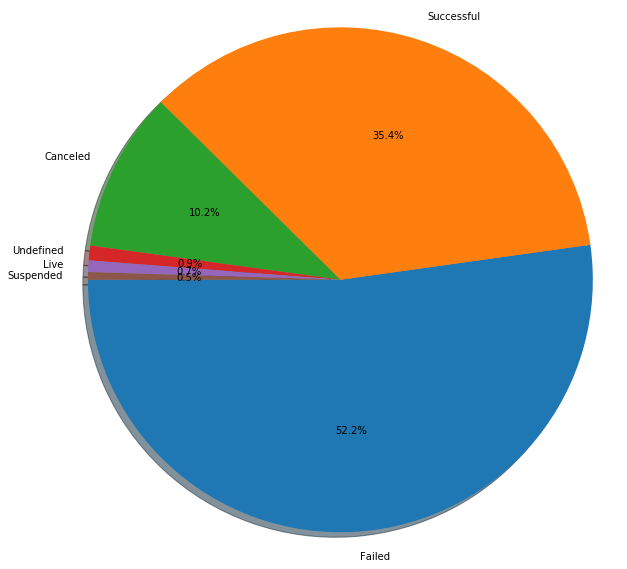

In [7]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Failed', 'Successful', 'Canceled', 'Undefined', 'Live', 'Suspended'
sizes = [197719, 133956, 38779, 3562, 2799, 1846]
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### 1c. Create a new "Completed" dataframe that removes any rows with `state` of 'live', 'undefined', or suspended.

*note - from here out we'll be looking at the completed project data unless mentioned otherwise

In [8]:
ks_f = ks_data.loc[ks_data["state"] == "failed"]
ks_s = ks_data.loc[ks_data["state"] == "successful"]
ks_c = ks_data.loc[ks_data["state"] =="canceled"]
ks_complete = pd.concat([ks_f, ks_s, ks_c])

In [9]:
ks_complete.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.0,failed,40,US,453.0,453.0,25000.00


### 2a. What is the overall success rate for all completed kickstarter projects?

In [10]:
av_success = len(ks_s) / len(ks_complete)
rate = round(av_success, 2) * 100

In [11]:
print("The overall success rate for completed Kickstarter projects is " + str(rate) +"%")

The overall success rate for completed Kickstarter projects is 36.0%


### 2b. Which 5 projects were pledged the most money (usd_pledged_real)?

In [12]:
ks_complete.sort_values(by="usd_pledged_real", ascending=False).head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
157270,1799979574,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,2015-03-28,500000.0,2015-02-24 15:44:42,20338986.27,successful,78471,US,20338986.27,20338986.27,500000.0
250254,342886736,COOLEST COOLER: 21st Century Cooler that's Act...,Product Design,Design,USD,2014-08-30,50000.0,2014-07-08 10:14:37,13285226.36,successful,62642,US,13285226.36,13285226.36,50000.0
216629,2103598555,"Pebble 2, Time 2 + All-New Pebble Core",Product Design,Design,USD,2016-06-30,1000000.0,2016-05-24 15:49:52,12779843.49,successful,66673,US,12779843.49,12779843.49,1000000.0
289915,545070200,Kingdom Death: Monster 1.5,Tabletop Games,Games,USD,2017-01-08,100000.0,2016-11-25 06:01:41,12393139.69,successful,19264,US,5228482.00,12393139.69,100000.0
282416,506924864,Pebble: E-Paper Watch for iPhone and Android,Product Design,Design,USD,2012-05-19,100000.0,2012-04-11 06:59:04,10266845.74,successful,68929,US,10266845.74,10266845.74,100000.0


### 2c. Which 5 projects had the most backers?

In [13]:
ks_complete.sort_values(by="backers", ascending=False).head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
187652,1955357092,Exploding Kittens,Tabletop Games,Games,USD,2015-02-20,10000.0,2015-01-20 19:00:19,8782571.99,successful,219382,US,8782571.99,8782571.99,10000.0
75900,1386523707,Fidget Cube: A Vinyl Desk Toy,Product Design,Design,USD,2016-10-20,15000.0,2016-08-30 22:02:09,6465690.30,successful,154926,US,13770.00,6465690.30,15000.0
292244,557230947,"Bring Reading Rainbow Back for Every Child, Ev...",Web,Technology,USD,2014-07-02,1000000.0,2014-05-28 15:05:45,5408916.95,successful,105857,US,5408916.95,5408916.95,1000000.0
148585,1755266685,The Veronica Mars Movie Project,Narrative Film,Film & Video,USD,2013-04-13,2000000.0,2013-03-13 15:42:22,5702153.38,successful,91585,US,5702153.38,5702153.38,2000000.0
182657,1929840910,Double Fine Adventure,Video Games,Games,USD,2012-03-14,400000.0,2012-02-09 02:52:52,3336371.92,successful,87142,US,3336371.92,3336371.92,400000.0


### 2d. Which year had the most competition? (# of projects)

In [14]:
ks_complete["year"] = pd.to_datetime(ks_complete["deadline"]).dt.year

In [15]:
ks_complete["year"]. value_counts()

2015    74439
2014    65377
2016    57112
2017    52393
2013    44118
2012    41507
2011    25055
2010     9090
2009      902
2018      461
Name: year, dtype: int64

### 3a. What is the success rate for all projects broken down by `main_category`?

In [16]:
pct_success = (ks_complete['main_category'][ks_complete['state'] == 'successful']
.value_counts() / ks_complete['main_category'].value_counts()
* 100).sort_values(ascending=False)

In [17]:
print(pct_success)

Dance           62.580300
Theater         60.221198
Comics          54.496269
Music           49.126974
Art             41.309263
Film & Video    37.929097
Games           36.051032
Design          35.743326
Publishing      31.500499
Photography     30.960187
Food            25.077272
Fashion         24.940914
Crafts          24.419813
Journalism      21.660959
Technology      20.254998
Name: main_category, dtype: float64


`Dance` had the highest success rate, with a surprising 62.5%

### 3b. Show a horizontal bar chart for project success rate by main_category, sorted by highest to lowest.

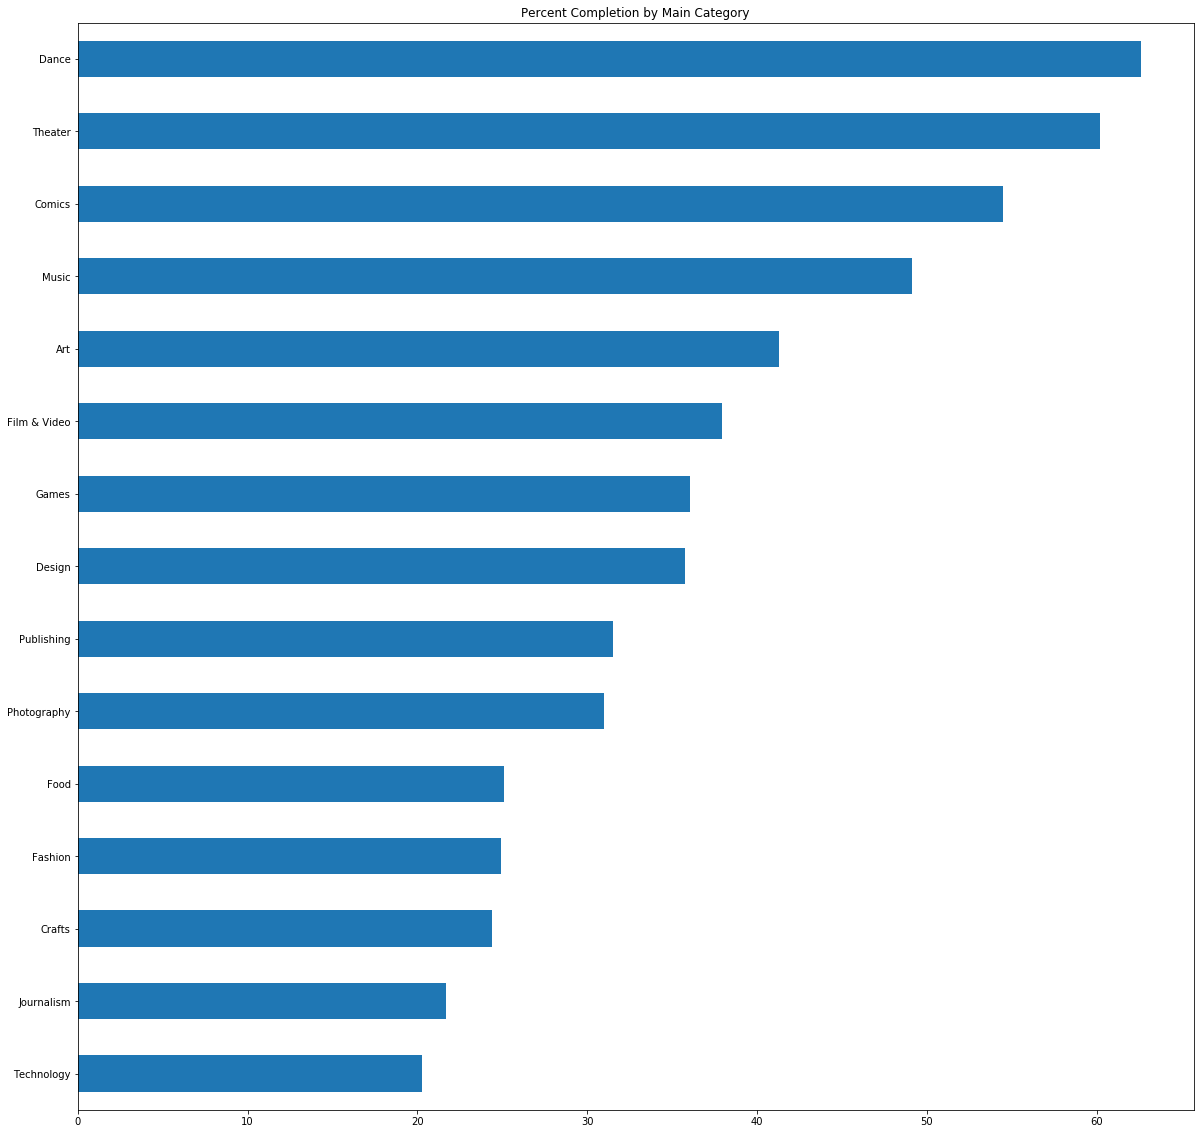

In [18]:
pct_success = pct_success.sort_values(ascending=True)
pct_success.plot.barh(title = "Percent Completion by Main Category", figsize=(20, 20))

### 3c. Within the Games main_category, what is the success rate for each category within it?

In [19]:
games = ks_complete[ks_complete['main_category']=='Games']
games.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,year
13,1000056157,G-Spot Place for Gamers to connect with eachot...,Games,Games,USD,2016-03-25,200000.0,2016-02-09 23:01:12,0.0,failed,0,US,0.0,0.0,200000.0,2016
43,1000170964,Penny Bingo Playing Card Game fun for the whol...,Tabletop Games,Games,USD,2017-03-27,1500.0,2017-03-02 04:01:43,856.0,failed,25,US,324.0,856.0,1500.0,2017
79,1000328150,Legacy of Svarog | a Unique 3D Action RPG and ...,Video Games,Games,USD,2015-10-30,50000.0,2015-08-31 06:33:31,1410.0,failed,38,US,1410.0,1410.0,50000.0,2015


In [20]:
games_pct = pd.crosstab(games['category'], games['state'], normalize='index')
games_pct

state,canceled,failed,successful
category,,,
Games,0.169663,0.584674,0.245664
Gaming Hardware,0.246114,0.497409,0.256477
Live Games,0.137352,0.684783,0.177866
Mobile Games,0.176370,0.736301,0.087329
Playing Cards,0.178995,0.425828,0.395178
Puzzles,0.115044,0.495575,0.389381
Tabletop Games,0.163414,0.276250,0.560336
Video Games,0.202121,0.593790,0.204089


In [21]:
games_pct = games_pct['successful'].sort_values(ascending=False)
games_pct

category
Tabletop Games     0.560336
Playing Cards      0.395178
Puzzles            0.389381
Gaming Hardware    0.256477
Games              0.245664
Video Games        0.204089
Live Games         0.177866
Mobile Games       0.087329
Name: successful, dtype: float64

## 4a. Calculate the 'pct_of_goal' for each completed project

In [22]:
ks_complete.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,year
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,2017
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2013
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,2012
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.0,failed,40,US,453.0,453.0,25000.00,2016


In [23]:
ks_complete['pct_of_goal'] = ((ks_complete['usd_pledged_real']) / (ks_complete['usd_goal_real'])*100).round(2)
ks_complete['pct_of_goal'].describe()

count    3.704540e+05
mean     3.272709e+02
std      2.697464e+04
min      0.000000e+00
25%      4.800000e-01
50%      1.367000e+01
75%      1.066700e+02
max      1.042779e+07
Name: pct_of_goal, dtype: float64

## 4b. What were the top 5 projects when looking at pct_of_goal for all time?

In [24]:
ks_complete.sort_values(by='pct_of_goal', inplace=True, ascending=False)
ks_complete.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,year,pct_of_goal
369176,9509582,VULFPECK /// The Beautiful Game,Music,Music,USD,2016-10-17,1.0,2016-08-18 09:04:03,104277.89,successful,3917,US,23874.13,104277.89,1.0,2016,10427789.0
186096,1947298033,Re-covering with Friends,Rock,Music,USD,2016-12-13,1.0,2016-10-14 19:04:27,68764.10,successful,955,US,9306.00,68764.10,1.0,2016,6876410.0
360721,907870443,VULFPECK /// Thrill of the Arts,Music,Music,USD,2015-10-09,1.0,2015-08-10 19:31:56,55266.57,successful,1673,US,55266.57,55266.57,1.0,2015,5526657.0
76290,1388400809,Energy Hook,Video Games,Games,USD,2013-06-10,1.0,2013-05-10 01:22:38,41535.01,successful,1622,US,41535.01,41535.01,1.0,2013,4153501.0
81368,1413857335,Band of Brothers 2nd Chance,Tabletop Games,Games,USD,2016-08-02,1.0,2016-07-12 00:29:12,32843.00,successful,268,US,26095.00,32843.00,1.0,2016,3284300.0


## 4c. Plot a histogram distribution of all completed projects by pct_of_goal


Since there were so many kickstarts that failed with \$0 pledged, let's only graph those with at least 10\% pledged

In [25]:
def over_300(val):
    if val > 300:
        return 301
    else:
        return val

In [26]:
ks_complete['over_300'] = ks_complete['pct_of_goal'].map(over_300)
ks_complete['over_300'].astype('float')
ks_complete['over_300'].value_counts()

0.00      54648
301.00    15624
100.00     4174
0.01       3894
0.02       3187
          ...  
194.30        1
279.28        1
78.94         1
171.26        1
70.04         1
Name: over_300, Length: 22412, dtype: int64

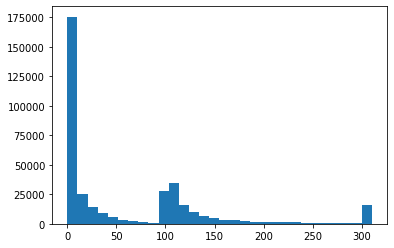

In [27]:
fig, ax = plt.subplots()
ax.hist(ks_complete['over_300'], bins=30, range=(0,310))
plt.show()

## 4d. Create 2 histogram subplots by pct_of_goal: 1) state=successful, and 2) all others (failed)

In [28]:
pct_pt = ks_complete.pivot_table(values='pct_of_goal', index='state')
pct_pt

,pct_of_goal
state,
canceled,123.990150
failed,9.061944
successful,855.794954


In [29]:
pct_gb = ks_complete.groupby('state')['pct_of_goal']
pct_gb_counts = pct_gb.value_counts()
pct_gb_counts

state       pct_of_goal
canceled    0.00           12399
            0.01             394
            0.02             296
            0.20             259
            0.10             255
                           ...  
successful  3284300.00         1
            4153501.00         1
            5526657.00         1
            6876410.00         1
            10427789.00        1
Name: pct_of_goal, Length: 40628, dtype: int64

In [30]:
ks_success = ks_complete[ks_complete['state'] == 'successful']

In [31]:
ks_not_success = ks_complete[ks_complete['state'] != 'successful'] 
ks_not_success['over_300'].value_counts()

0.00      54648
0.01       3894
0.02       3187
0.10       2208
1.00       2085
          ...  
96.58         1
221.00        1
67.12         1
53.93         1
192.00        1
Name: over_300, Length: 8630, dtype: int64

In [32]:
ks_success['over_300'].value_counts()

301.00    15489
100.00     4123
101.00      564
102.00      511
105.00      501
          ...  
246.42        1
219.19        1
154.81        1
202.28        1
249.24        1
Name: over_300, Length: 14222, dtype: int64

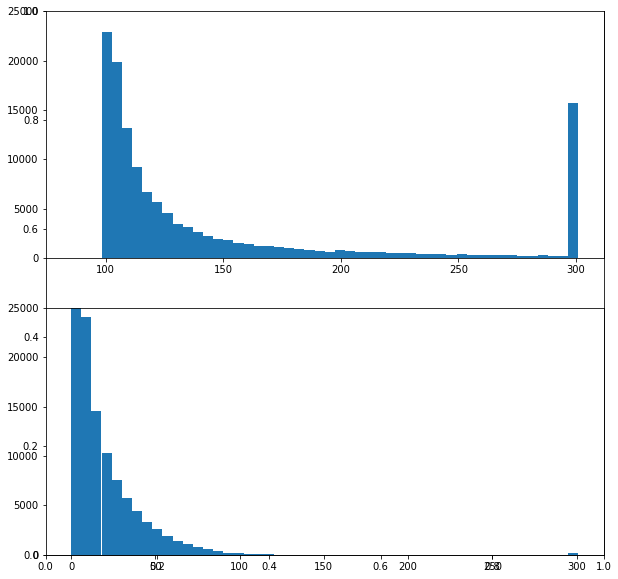

In [33]:
# matplotlib hist:
fig, ax = plt.subplots(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.hist(ks_success['over_300'], bins=50)
ax1.set_ylim(0,25000)

ax2.hist(ks_not_success['over_300'], bins=50)
ax2.set_ylim(0, 25000)
#ax2.tick_params(bottom='off')

plt.show()

#why x,y labels and ticks incorrect?

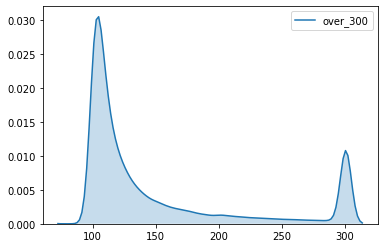

In [34]:
# seaborn kde plot:
sns.kdeplot(ks_success['over_300'], shade=True)
plt.show()

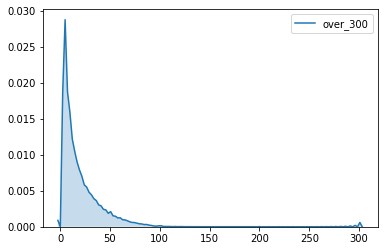

In [35]:
sns.kdeplot(ks_not_success['over_300'], shade=True)
plt.show()

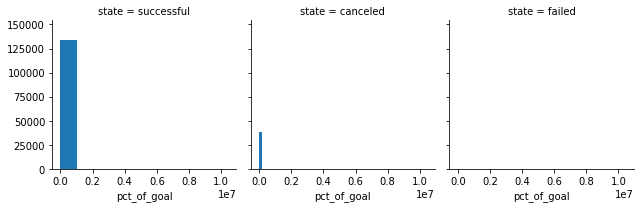

In [36]:
# seaborn FacetGrid:

g = sns.FacetGrid(ks_complete, col='state')
g.map(plt.hist, 'pct_of_goal' )

## 5a/b. What is the average/median usd_goal_real for all completed kickstarter projects, broken down by main_category

In [37]:
grouped = ks_complete.groupby('main_category')['usd_goal_real']
grouped.agg([np.mean, np.median, np.min, np.max])

,mean,median,amin,amax
main_category,,,,
Art,39467.623304,3000.00,0.01,1.000000e+08
Comics,19675.773316,3500.00,0.72,1.000000e+08
Crafts,10423.092597,2330.35,1.00,1.000000e+07
Dance,9408.592117,3310.00,5.00,2.000000e+06
Design,42199.323873,10000.00,0.75,1.000000e+08
Fashion,22530.494784,5983.55,0.77,1.000000e+08
Film & Video,82375.686055,7000.00,0.15,1.513959e+08
Food,48661.356201,10000.00,0.88,1.663614e+08
Games,45148.243871,8000.00,0.75,1.000000e+08


## 5c/d. What is the average/median usd_pledged_real for all completed kickstarter projects, broken down by main_category

In [38]:
grouped_complete = ks_success.groupby('main_category')['usd_goal_real']
grouped_complete_values = grouped_complete.agg([np.mean, np.median, np.min, np.max])
print(grouped_complete_values)

                       mean    median  amin        amax
main_category                                          
Art             4410.086374   2000.00  0.01   600000.00
Comics          5397.352176   2619.71  0.72   250000.00
Crafts          3013.430794   1000.00  1.00    75783.09
Dance           4601.094769   3000.00  5.00   125000.00
Design         15408.835300   7500.00  0.75  1000000.00
Fashion         9080.955291   5000.00  1.00   300000.00
Film & Video   11145.188408   5000.00  0.77  2000000.00
Food           11633.962945   7343.91  0.88   350000.00
Games          14857.224807   5000.00  0.75  2015608.88
Journalism      8148.647846   3000.00  1.00   177794.64
Music           5736.980040   3210.12  0.74   250000.00
Photography     6490.599673   3000.00  1.00   400000.00
Publishing      5897.848654   3000.00  0.55   250000.00
Technology     26286.354186  10000.00  0.75  1000000.00
Theater         5198.043532   2650.00  1.00   333841.51


##  5e. What insights does this information provide?

`Technology` has the highest mean and median goal in both `completed` and `successful` category. `Art` has the lowest min starting `usd_goal_real` in both categories.

## 5f. Based on this information, if someone wanted to choose the main_category with the highest combined success rate and pledged dollar amount, which one would you recommend?

In [39]:
overall = pd.concat([grouped_complete_values, pct_success], axis=1)
overall = overall.rename(columns={'main_category':'percent_complete'})
overall.sort_values(by='percent_complete', ascending=False)

,mean,median,amin,amax,percent_complete
Dance,4601.094769,3000.00,5.00,125000.00,62.580300
Theater,5198.043532,2650.00,1.00,333841.51,60.221198
Comics,5397.352176,2619.71,0.72,250000.00,54.496269
Music,5736.980040,3210.12,0.74,250000.00,49.126974
Art,4410.086374,2000.00,0.01,600000.00,41.309263
Film & Video,11145.188408,5000.00,0.77,2000000.00,37.929097
Games,14857.224807,5000.00,0.75,2015608.88,36.051032
Design,15408.835300,7500.00,0.75,1000000.00,35.743326
Publishing,5897.848654,3000.00,0.55,250000.00,31.500499
Photography,6490.599673,3000.00,1.00,400000.00,30.960187


`Dance`, `Theater` and `Comics` all have a higher than 50% completion, with `Comics` having the highest mean value at \$5\,397. The top 3 highest mean inculde: `Technology`, `Design` and `Games`, with the highest competetion rate going to `games` with 36%.

A "safer" option would be `Theater` or `Comics`, while a "riskier" option is `Technology` with the highest payoff but lowest completion rate.

## 6a. Create a new column 'months' that shows how many months the project was active between launch and deadline.

In [40]:
ks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [41]:
# first we'll need to convert 'launched' and 'deadline' to type datetime

ks_data['launched'] = pd.to_datetime(ks_data['launched'])
ks_data['deadline'] = pd.to_datetime(ks_data['deadline'])

#now lets generarte the new column
ks_data['months'] = (ks_data['deadline'] - ks_data['launched']) / np.timedelta64(1, 'M')
ks_data['months']

0         1.921726
1         1.964814
2         1.477994
3         0.980988
4         1.828122
            ...   
378656    0.982099
378657    0.882171
378658    1.484391
378659    0.993543
378660    0.907439
Name: months, Length: 378661, dtype: float64

## 6b. Compare the avg months for successful projects vs non-successful. Add visuals if you'd like.

In [42]:
grouped_months = ks_data.groupby('state')['months']
grouped_months_mean = grouped_months.mean()
grouped_months_values = grouped_months.agg([np.mean, np.median, np.min, np.max])
print(grouped_months_values)

                mean    median      amin        amax
state                                               
canceled    1.238679  0.980431  0.003143  488.452193
failed      1.137120  0.976997  0.001166    3.021422
live        1.289052  1.083030  0.118394    1.972557
successful  1.037793  0.968118  0.000166    3.012157
suspended   1.442903  0.979237  0.028089  549.956536
undefined   1.061652  0.969542  0.036421    2.942919


Text(0, 0.5, 'Months')

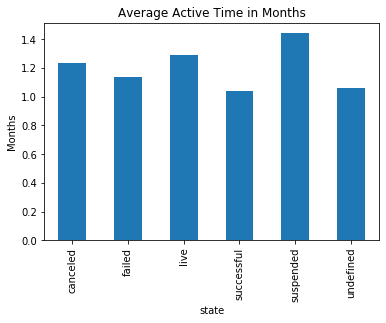

In [43]:
grouped_months_mean.plot(kind='bar')
plt.title('Average Active Time in Months')
plt.ylabel('Months')

## 6c. Does the length of a project in months seem to have an impact?

According to our graphic above, `successful` projects appear to have the shortest timeline of the all, with `undefined` being nearly tied. It is wirth noting that the overall difference between them is only 0.4 months, or about 12 days. The medians are even closer, within 0.12.

## 7a. Calculate the expected value for the Games: Video Games category, with the expected value defined as (median of usd_pledged_real)* (success rate of completed projects).

In [44]:
#first, a pivot table of video games by state and median
ks_data["year"] = pd.to_datetime(ks_data["deadline"]).dt.year
video_games = ks_data[ks_data['category'] == 'Video Games']
video_games_pt = pd.pivot_table(video_games, index = 'state', values = 'usd_pledged_real', aggfunc=(np.median, 'count'))
video_games_pt

,count,median
state,,
canceled,2363,151.000
failed,6942,184.000
live,86,153.435
successful,2386,11227.920
suspended,53,10.000


In [45]:
#now we add a success rate column
video_games_pt['success_rate'] = ((video_games_pt['count'] / video_games_pt['count'].sum()))
video_games_pt

,count,median,success_rate
state,,,
canceled,2363,151.000,0.199746
failed,6942,184.000,0.586813
live,86,153.435,0.007270
successful,2386,11227.920,0.201691
suspended,53,10.000,0.004480


In [46]:
#let's generate the expected value
video_games_pt['expected_value'] = video_games_pt['median'] * video_games_pt['success_rate']
video_games_pt

,count,median,success_rate,expected_value
state,,,,
canceled,2363,151.000,0.199746,30.161708
failed,6942,184.000,0.586813,107.973626
live,86,153.435,0.007270,1.115419
successful,2386,11227.920,0.201691,2264.566113
suspended,53,10.000,0.004480,0.044801


We can see the expected value for a successful video game is $2,264

## 7b. Do this again but broken down by deadline year

In [47]:

#lets add a successful column to aid in the table

temp = pd.get_dummies(video_games['state'])
temp = temp['successful']
video_games = pd.concat([video_games, temp], axis=1)
video_games.head()


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,months,year,successful
79,1000328150,Legacy of Svarog | a Unique 3D Action RPG and ...,Video Games,Games,USD,2015-10-30,50000.0,2015-08-31 06:33:31,1410.00,failed,38,US,1410.00,1410.00,50000.00,1.962315,2015,0
126,1000524949,Operation: Make Stuff,Video Games,Games,USD,2012-10-18,200.0,2012-09-18 04:46:06,306.72,successful,36,US,306.72,306.72,200.00,0.979119,2012,1
159,1000648918,"ADVENT SAGA, DIGITAL TACTICAL CARD GAME",Video Games,Games,USD,2014-07-31,70000.0,2014-07-01 16:01:41,15542.11,failed,260,US,15542.11,15542.11,70000.00,0.963705,2014,0
192,1000786724,Harold VS The Horde,Video Games,Games,USD,2015-01-18,14000.0,2014-12-19 07:49:11,113.00,failed,18,US,113.00,113.00,14000.00,0.974942,2015,0
199,1000811882,The Sword of Asumi Visual Novel,Video Games,Games,GBP,2014-11-10,2500.0,2014-10-19 20:35:23,3097.00,successful,107,GB,4983.78,4848.23,3913.65,0.694621,2014,1


In [48]:
#now lets create a pivot table

video_games_pt = pd.pivot_table(video_games, index='year', values=['name', 'usd_pledged_real', 'successful'], 
                                aggfunc={'name':'count', 'usd_pledged_real': 'median', 'successful':'sum'})
video_games_pt['success_rate'] = video_games_pt['successful'] / video_games_pt['name']
video_games_pt['excepted_value'] = video_games_pt['usd_pledged_real']*video_games_pt['success_rate']
video_games_pt = video_games_pt.reset_index()
print(video_games_pt)
video_games_pt.info()

   year  name  successful  usd_pledged_real  success_rate  excepted_value
0  2009    24         9.0            230.00      0.375000       86.250000
1  2010   151        40.0            305.00      0.264901       80.794702
2  2011   331        85.0            310.00      0.256798       79.607251
3  2012  1412       293.0            798.04      0.207507      165.598952
4  2013  1846       436.0           1158.21      0.236186      273.553391
5  2014  2107       421.0            501.00      0.199810      100.104888
6  2015  2221       373.0            183.54      0.167942       30.824142
7  2016  1945       382.0            247.12      0.196401       48.534622
8  2017  1695       347.0            275.00      0.204720       56.297935
9  2018    97         0.0            121.37      0.000000        0.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            -------------- 

## 7c. Show this in a bar chart

Text(0.5, 1.0, 'Expected Value of Video Games')

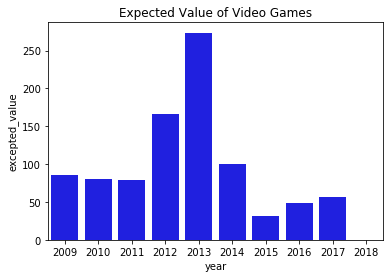

In [49]:
#here i discovered my earlier misspelling of expected...
sns.barplot(x='year', y='excepted_value', data=video_games_pt,
            label="Expected Value", color="b")
plt.title('Expected Value of Video Games')

## 7d. What insights does this data provide you?

2009 to 2011 were fairly stable and then the value climbed in 2012 and peaked in 2013. The expected value dropped precipitously the next two years and since leveled off. As of 2017 it wa approaching, but not yet at, 2009-2011 levels.

## 8a. Calculate the project count, success rate, and pct_of_goal for all projects with 'planner' in the name.
Check for spelling variations in upper/lowercase.

In [61]:
plan = ks_data['name'].str.lower().str.contains('planner', na=False)

In [62]:
planner = ks_data[plan]
planner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 3119 to 378485
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                367 non-null    int64         
 1   name              367 non-null    object        
 2   category          367 non-null    object        
 3   main_category     367 non-null    object        
 4   currency          367 non-null    object        
 5   deadline          367 non-null    datetime64[ns]
 6   goal              367 non-null    float64       
 7   launched          367 non-null    datetime64[ns]
 8   pledged           367 non-null    float64       
 9   state             367 non-null    object        
 10  backers           367 non-null    int64         
 11  country           367 non-null    object        
 12  usd pledged       364 non-null    float64       
 13  usd_pledged_real  367 non-null    float64       
 14  usd_goal_real     36

There are 367 projects in `planner`

In [65]:
success_rate = len(planner[planner['state']=='successful']) / len(planner[planner['state']!='successful'])
success_rate

0.5355648535564853

The mean success rate for `planner` is 53.5%

In [69]:
planner_mean = planner.copy()
planner_mean['pct_of_goal'] = ((planner_mean['usd_pledged_real']) / (planner_mean['usd_goal_real'])*100).round(2)
mean_pct_goal = planner_mean['pct_of_goal'].mean()
mean_pct_goal

194.64847411444134

The mean `pct_of_goal` for `planner` is 194.6

## 8b. How about all projects with both 'planner' and 'Panda' in the name?

In [78]:
planner_pandas = planner['name'].str.lower().str.contains('panda')
planner_pandas = planner[planner_pandas]
planner_pandas.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,months,year,pct_of_goal
374940,980774782,Panda Planner Pro: Happiness + Productivity = ...,Product Design,Design,USD,2016-04-02,10000.0,2016-02-29 17:00:53,26944.0,successful,829,US,26944.0,26944.0,10000.0,1.060919,2016,269.44


## Congrats!